# Teoría

La integración numérica por medio de la regla del trapecio permite hallar una aproximación del área debajo de la curva mediante el uso de trapecios rectos.

La _**regla del trapecio**_ se expresa matemáticamente de la siguiente forma:

$$\int\limits_{a}^{b}f(x)dx\approx\frac{\Delta x}{2}[f(x_1) + 2f(x_2) + 2f(x_3) + \dotsb + 2f(x_N) + f(x_{N+1})]$$

$$\Delta x = \frac{b-a}{N}$$

Asimismo, es posible hallar el _**error**_ de esta aproximación:

$$|E_N| \leq \frac{M(b-a)^3}{12N^2}, \ \ M = max|f''(x)|$$

$$|E_N|\rightarrow 0,\ N \rightarrow \infty$$ 

# Código

Importar librerías necesarias

In [1]:
import math as m                       #Funciones matemáticas básicas
import numpy as np                     #Usar vectores de forma sencilla
import matplotlib.pyplot as plt        #Grafiar funciones
import sympy as sp                     #Usar funciones simbólicas para derivarlas

Se digita la función deseada, en este caso:

$$f(x)=e^{x^2}$$

In [2]:
#No olvidar cambiar la función también en la sección de error
def f(x):
    return pow(np.e, x**2)

Especificar el intervalo $[a,b]$ en $N$ subintervalos

In [3]:
print("Ingrese los valores correspondientes a los extremos y el número de subintervalos", end="\n\n")

a = float(input("Ingrese valor de a: "))
b = float(input("Ingrese valor de b: "))
N = int(input("Ingrese valor de N: "))

Ingrese los valores correspondientes a los extremos y el número de subintervalos

Ingrese valor de a: 0
Ingrese valor de b: 1
Ingrese valor de N: 30


Ahora se calcula $\Delta x$

In [4]:
dx = (b-a)/N
print(f"dx: {dx}")

dx: 0.03333333333333333


Con este valor, se debe hallar ahora el valor de cada  $x_i,\ \ i = 1, 2, \dots, N+1$

In [5]:
vector_xi =[]

#La función range no incluye el número final (en este caso N+2, solo hasta N+1)
for i in range(1, N+2):
    xi = a + (i-1)*dx
    vector_xi.append(xi)

vector_xi = np.array(vector_xi)
print(f"Valores de xi:\n{vector_xi}")

Valores de xi:
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]


In [6]:
#Valor inicial de la suma es igual a cero
S = 0

#En este for, xi toma valores desde indice 1 hasta el penúltimo elemento del vector
for xi in vector_xi[1:-1]:
    S+=2*f(xi)

#Recordemos que el primer y último xi son iguales a "a" y "b" respectivamente
S +=(f(a) + f(b))

#Por último, se multiplica por delta de x entre 2
S*=(dx/2)
print(f"El valor aproximado de la integral f(x) es {S}")

El valor aproximado de la integral f(x) es 1.4631550382498777


---

# Estimación del error
Para hallar una estimación del __**error**__ en la _regla del trapecio_, es necesario reescribir la fórmula para hacer uso de ciertas librerías

Recordemos que el error se expresa de la siguiente manera:

$$|E_N| \leq \frac{M(b-a)^3}{12N^2}, \ \ M = max|f''(x)|$$

Se debe hallar el valor de $M$. Para esto, se va a obtener primero la segunda derivada

Reingresar la función con los cambios necesarios para ser procesado por la librería *Sympy*, que permite derivar funciones escritas de forma simbólica.

In [7]:
#Convertir x en un símbolo
x = sp.Symbol('x')

#En ocasiones, se debe cambiar las librerias de Numpy por las de Sympy
#Por ejemplo, los np.sin (seno) se reemplaza por sp.sin
def f_aux(x):
    return pow(np.e, x**2)

Hallar la segunda derivada de la función $f(x)$

In [8]:
d2f = sp.diff(f_aux(x), x, 2)

Para hallar los valores de $f''(x)$, se va a evaluar en un gran número de valores dentro del intervalo $[a,b]$, para mayor precisión

In [9]:
X_dots = np.linspace(a, b, 5000)

Luego hallar todos los valores de $f''(x)$

In [10]:
#En una lista, guardar todos los valores de d2f
d2f_values=[]
for x2i in X_dots:
    #Mediante la funcion subs se puede evaluar la función d2f 
    d2f_values.append(d2f.subs(x, x2i))

print(d2f_values)

[2.00000000000000, 2.00000024009604, 2.00000096038424, 2.00000216086491, 2.00000384153851, 2.00000600240572, 2.00000864346741, 2.00001176472464, 2.00001536617864, 2.00001944783086, 2.00002400968294, 2.00002905173671, 2.00003457399417, 2.00004057645754, 2.00004705912922, 2.00005402201181, 2.00006146510809, 2.00006938842103, 2.00007779195382, 2.00008667570981, 2.00009603969256, 2.00010588390581, 2.00011620835351, 2.00012701303978, 2.00013829796895, 2.00015006314554, 2.00016230857425, 2.00017503425999, 2.00018824020784, 2.00020192642309, 2.00021609291122, 2.00023073967790, 2.00024586672898, 2.00026147407053, 2.00027756170878, 2.00029412965017, 2.00031117790134, 2.00032870646911, 2.00034671536049, 2.00036520458268, 2.00038417414310, 2.00040362404932, 2.00042355430913, 2.00044396493051, 2.00046485592162, 2.00048622729083, 2.00050807904669, 2.00053041119794, 2.00055322375352, 2.00057651672256, 2.00060029011438, 2.00062454393849, 2.00064927820460, 2.00067449292261, 2.00070018810261, 2.0007263

Por último, para hallar $M$, que es igual a $max|f''(x)|$, se va extraer el mayor valor de la lista

In [11]:
M = max(d2f_values)
print(M)

16.3096909707543


Después de hallar $M$, se puede obtener ahora el valor del error:

In [12]:
E_N = (M*((b-a)**3))/(12*(N**2))
print(f"El valor de E_N es menor o igual: {E_N}")

El valor de E_N es menor o igual: 0.00151015657136614


# Gráfica de la Regla del Trapecio

Para hallar la gráfica, primero se debe obtener los puntos $x$ y $y$ correspondientes a $f(x)$

In [13]:
#Los valores de cada xi evaluado en la función f(x)
vector_yi=f(vector_xi)

Luego, dibujar la gráfica de $f(x)$. Para que la curva este suavizada, se usan más puntos que anteriormente

In [14]:
#La función linspace devuelve un array numpy. El tercer parámetro es el número de puntos.
#Se múltiplia este parametro por 100 para suavizar
X_graph = np.linspace(a, b, 100*N)

#Y_graph es un array numpy que guarda los valores de cada X_graph evaluado en la función
Y_graph = f(X_graph)

Con esto, se va a graficar primero la curva de la función $f(x)$, dibujar los trapecios y, finalmente, las lineas que permitan distinguir entre cada trapecio.

Tener en cuenta que si el gráfico se ve blanco, puede ser por dos motivos:

- Las lineas blancas que permiten distinguir el trapecio tapan la gráfica original. Para corregir esto, comentar o eliminar esa sección del código
- La función está mal introducida. Revisar las entradas

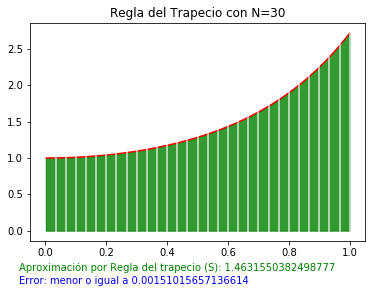

In [15]:
#Gráfica de la curva
plt.plot(X_graph,Y_graph,'r')

#Rellenar el área entre la curva y el eje x
#Específicamente, el área entre f(xi)=0 y f(xi)=yi
plt.fill_between(vector_xi, 0,vector_yi, color='g',alpha=.8, edgecolor='g')

############# Lineas blancas para visualizar trapecios########################

#Comentar esta parte si la gráfica no se observa

#Colocar líneas para observar mejor los trapecios
for i in vector_xi:
    plt.axvline(i, color='w', alpha =.8)

##################################

plt.title(f"Regla del Trapecio con N={N}")
plt.figtext(0.1,0.02, f"Aproximación por Regla del trapecio (S): {S}", color='g')
plt.figtext(0.1, -0.025, f"Error: menor o igual a {E_N}", color='b')
plt.show()

# Nota:
Si se desea utilizar el código, puede entrar a [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb?utm_source=scs-index), subir el cuaderno y ejecutar.